<a href="https://colab.research.google.com/github/csorgod/ColorIn/blob/main/ColorIn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color In: Smart color explainer

Estima-se que 1 em cada 12 homens e 1 em cada 200 mulheres possui algum grau de daltonismo. No Brasil, cerca de 16 milhões de pessoas sofrem com a dificuldade em enxergar cores. Essa condição genética pode se encontrar em três diferentes tipos:

* Deuteranopia (cegueira ao verde), afetando cerca de 4,5% da população masculina e 0,2% da população feminina;

* Protanopia (cegueira ao vermelho) é menos comum, afetando cerca de 1% da população masculina e 0,05% da população feminina; e

* Acromatopsia (cegueira total à cor) é a forma mais rara, afetando menos de 0,01% da população.

Este projeto criado em cima das APIs do Google Gemini tem como propósito auxiliar pessoas daltônicas a identificar as cores em imagens.


O projeto utiliza a API do Vision AI para analisar imagens e identificar as cores predominantes. Em seguida, utiliza a API do Vertex AI para classificar o tipo de daltonismo do usuário, com base em uma imagem do rosto do usuário. Com base no tipo de daltonismo e nas cores identificadas na imagem, o projeto gera uma descrição acessível das cores para o usuário.

O projeto tem como objetivo melhorar a qualidade de vida das pessoas com daltonismo, facilitando a percepção de cores em diversas situações do dia a dia, como identificar objetos coloridos, interpretar sinais de trânsito e ler mapas e gráficos.

## Pré configuração

In [25]:
# Instalando pacotes
!pip install -q -U google-generativeai
!pip install -q -U google-cloud-aiplatform

In [61]:
# Importando bibliotecas

from IPython.display import Image

from google.colab import files
from google.colab import userdata
import google.generativeai as genai

In [27]:
# Configurando o projeto e as APIs

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key = GOOGLE_API_KEY)

In [56]:
"""
Usaremos o Gemini 1.5 pro por ser multimodal e capaz de descrever imagens.
Conforme dito em aula, não é possível alterar os parametros do modelo.
Entretanto, deixaremos o trecho de código abaixo para um futuro próximo, onde o
modelo aceitará customizações.
"""
generation_config = {
    "candidate_count": 1,
    "top_p": 0.95,
    "top_k": 0,
    "max_output_tokens": 1048,
    "temperature": .2
}

"""
Não será necessário definir configurações de segurança específicas para o case.
Usaremos o padrão do modelo. Entretanto, caso queira customizá-las, pode usar
o trecho abaixo
"""
safety_settings = {
    "HARASSMENT": "BLOCK_NONE",
    "HATE": "BLOCK_NONE",
    "SEXUAL": "BLOCK_NONE",
    "DANGEROUS": "BLOCK_NONE",
}

In [62]:
model = genai.GenerativeModel(model_name = "gemini-1.5-pro-latest",
                              generation_config = generation_config)

## 1. Começe por aqui

### Para começar, faça o upload de uma imagem do seu computador.

Essa imagem será usada para exemplificar o funcionamento do projeto. É importante escolher uma imagem colorida, de preferencia com cores vermelhas, verdes, marrons, azuis e amarelas. Essas cores representam as principais deficiências em daltonismo. Você poderá escolher o tipo de daltonismo mais à frente para testar.

Saving pic_2.jpg to pic_2.jpg


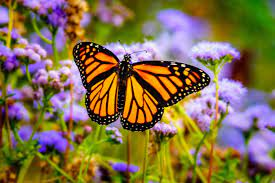

In [66]:
# Faça upload de uma imagem
uploaded = files.upload()
imagem_path = list(uploaded.keys())[0]

# Lendo imagem
with open(imagem_path, 'rb') as f:
    image_data = f.read()

Image(data = image_data)

Gostou da imagem? Caso não tenha ficado legal, execute novamente a célula acima para escolher outra foto.

## 2. Parametrizando o modelo
Nesta etapa, iremos configurar o sistema de acordo com suas necessidades. Ainda não estamos falando de configurações do modelo. Essa parametrização será usada para detectar as suas necessidades como uma pessoa daltônica.

In [55]:
# prompt: Ask for the user to select one between four options: Deuteranopia, Protanopia, Tritanopia or Acromatopsia

color_blindness = {
  1: "Deuteranopia",
  2: "Protanopia",
  3: "Tritanopia",
  4: "Acromatopsia"
}

selection = input("Qual o seu tipo de daltonismo? Selecione um número. \n1. Deuteranopia \n2. Protanopia \n3. Tritanopia \n4. Acromatopsia \n\n")

while int(selection) not in (1, 2, 3, 4):
  print("Você selecionou uma opção incorreta.")
  selection = input("Qual o seu tipo de daltonismo? \n1. Deuteranopia \n2. Protanopia \n3. Tritanopia \n4. Acromatopsia \n\n")

cb_type = color_blindness[int(selection)]

print(f"Entendido! Seu daltonismo é do tipo {cb_type}")

Qual o seu tipo de daltonismo? Selecione um número. 
1. Deuteranopia 
2. Protanopia 
3. Tritanopia 
4. Acromatopsia 

1
Entendido! Seu daltonismo é do tipo Deuteranopia


## 3. Solicitação ao modelo

In [68]:
genai.upload_file(imagem_path)
response = model.generate_content()

response.text

'Por favor, forneça a imagem para que eu possa descrever os elementos e as cores presentes nela. 😊 \n'

In [73]:
chat = model.start_chat(history=[
    {
      "role": "user",
      "parts": [f"{genai.upload_file(imagem_path)}"]
    }])


response = chat.send_message("Descreva os elementos e as cores na imagem")

In [74]:
response.text

'Por favor, forneça mais contexto ou informações. Não consigo ver a imagem que você está descrevendo. \n\nPara que eu possa descrever os elementos e as cores na imagem, preciso que você me forneça a imagem em si. Você pode:\n\n* **Descrever a imagem com suas palavras:** Detalhe o que você vê na imagem, incluindo os objetos, pessoas, cores, etc.\n* **Fornecer um link para a imagem:** Se a imagem estiver online, compartilhe o link para que eu possa acessá-la.\n* **Carregar a imagem:** Se a imagem estiver salva em seu dispositivo, você pode carregá-la aqui.\n\nAssim que eu tiver acesso à imagem, poderei descrevê-la para você. \n'